In [1]:
import sys
sys.path.append('/path/to/sc_gpu')
import sc_gpu as sg
import scanpy as sc
import scib
import time
from functools import wraps
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

In [2]:
def timeit(func):
    @wraps(func)
    def timeit_wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        print(f'Function {func.__name__} Took {total_time:.4f} seconds')
        return result
    return timeit_wrapper

In [3]:
adp = '/path/to/your/adata.h5ad'
ad = sc.read(adp)
ad

AnnData object with n_obs × n_vars = 33506 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'sample_ID', 'size_factors', 'species', 'study', 'tissue', 'leiden_raw', 'leiden_scvi'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'batch_colors', 'final_annotation_colors', 'hvg', 'leiden_raw_colors', 'leiden_scvi_colors', 'log1p', 'metrics_raw', 'metrics_scvi', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_scvi', 'X_umap', 'X_umap_raw', 'X_umap_scvi'
    varm: 'PCs'
    layers: 'counts', 'orig'
    obsp: 'connectivities', 'distances'

In [4]:
sc.settings.verbosity = 0
sc.set_figure_params(facecolor='w', dpi=80)

Function umap Took 6.8404 seconds


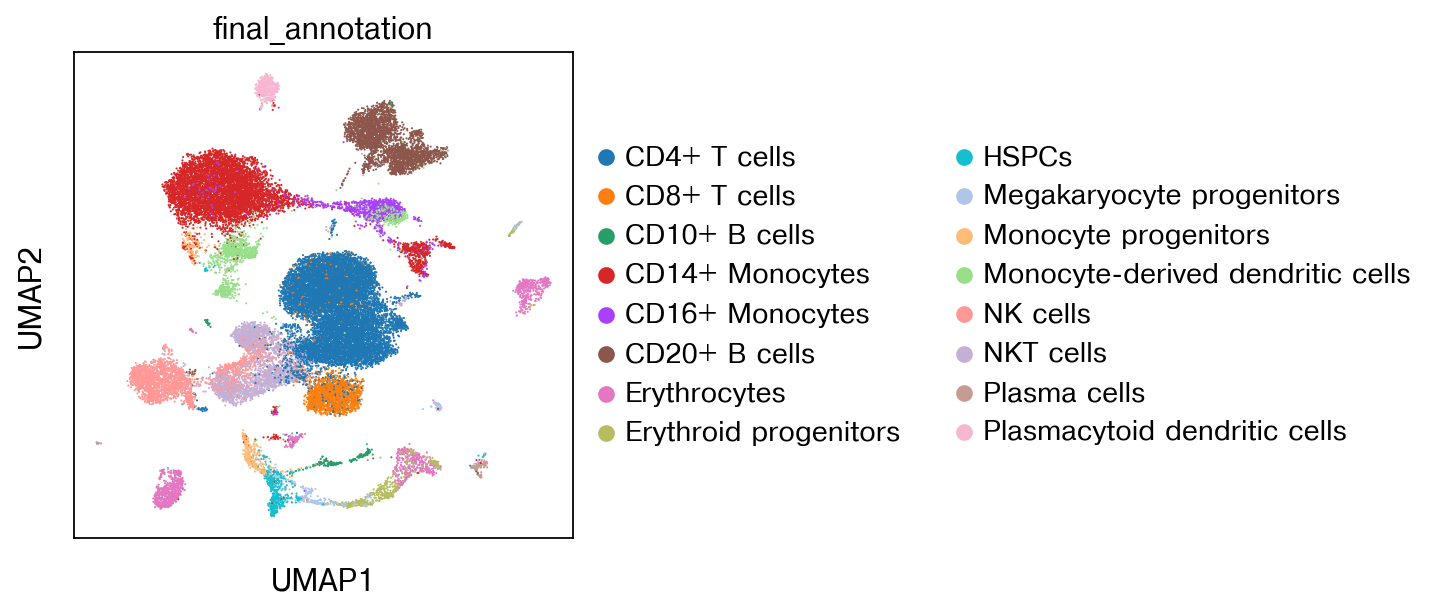

Function umap Took 35.6638 seconds


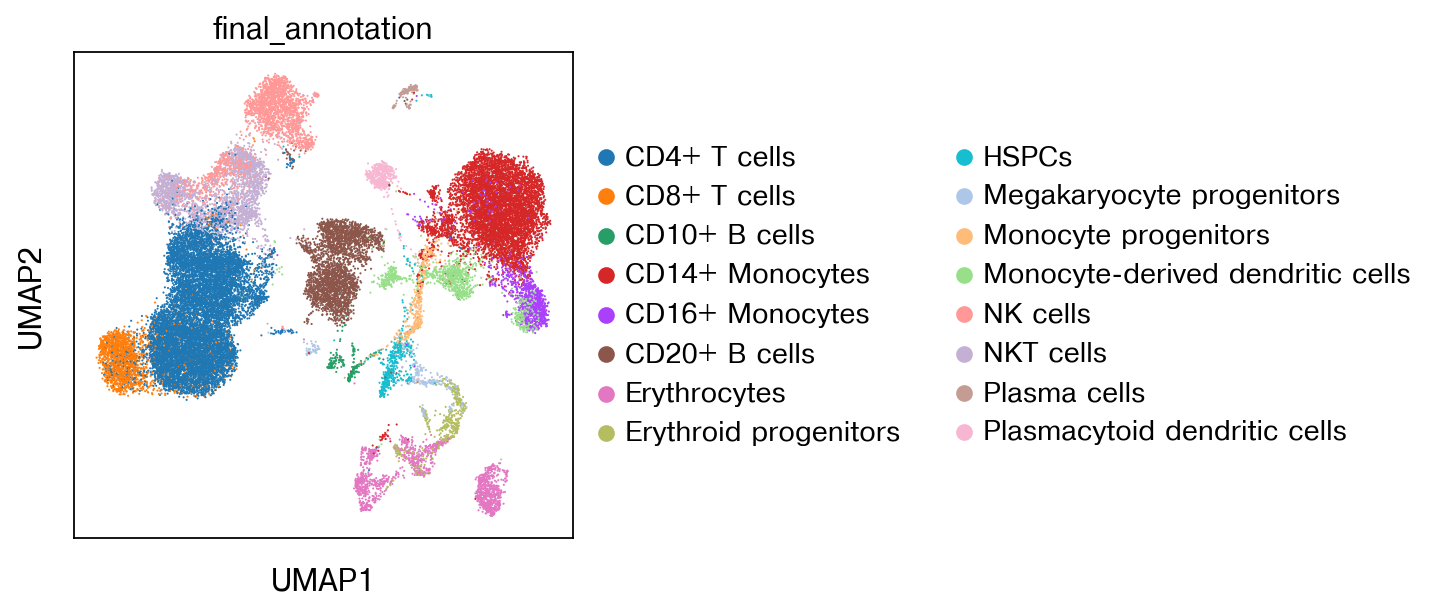

In [5]:
timeit(sg.sc.umap)(adata=ad, use_rep='X_scvi')
sc.pl.umap(ad, color='final_annotation')
timeit(sc.tl.umap)(adata=ad)
sc.pl.umap(ad, color='final_annotation')

[W] [15:44:27.979077] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
Function tsne Took 1.9216 seconds


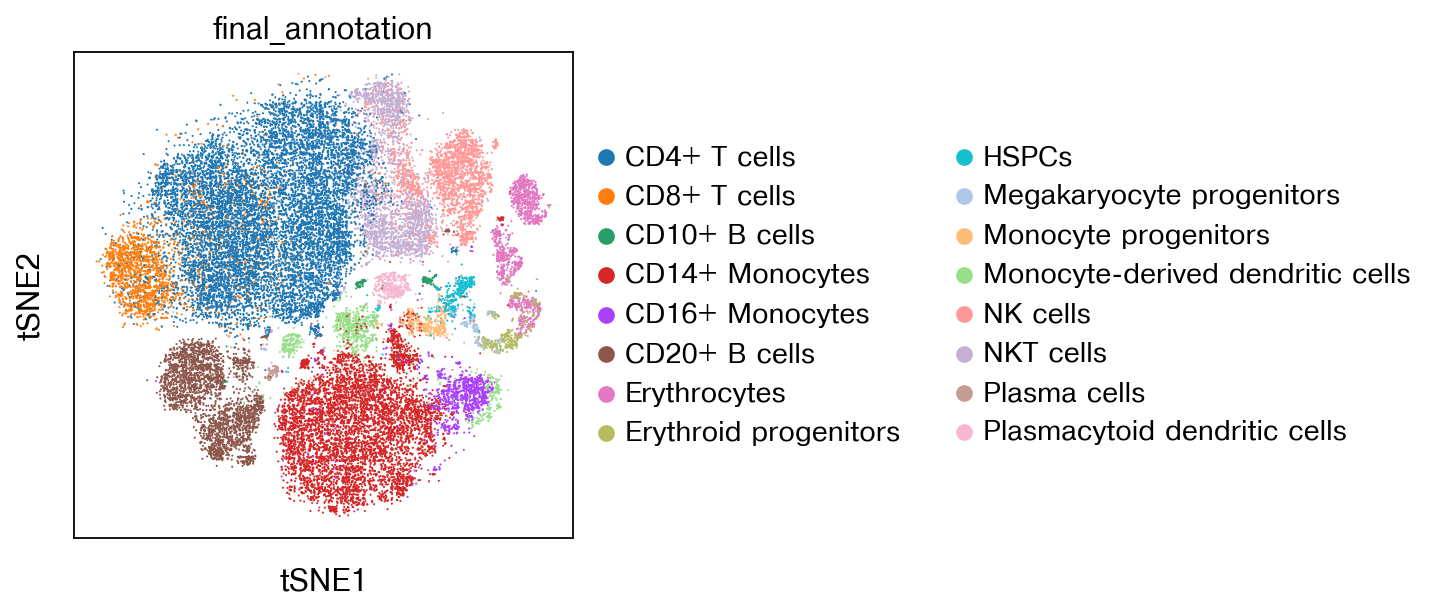

Function tsne Took 168.4081 seconds


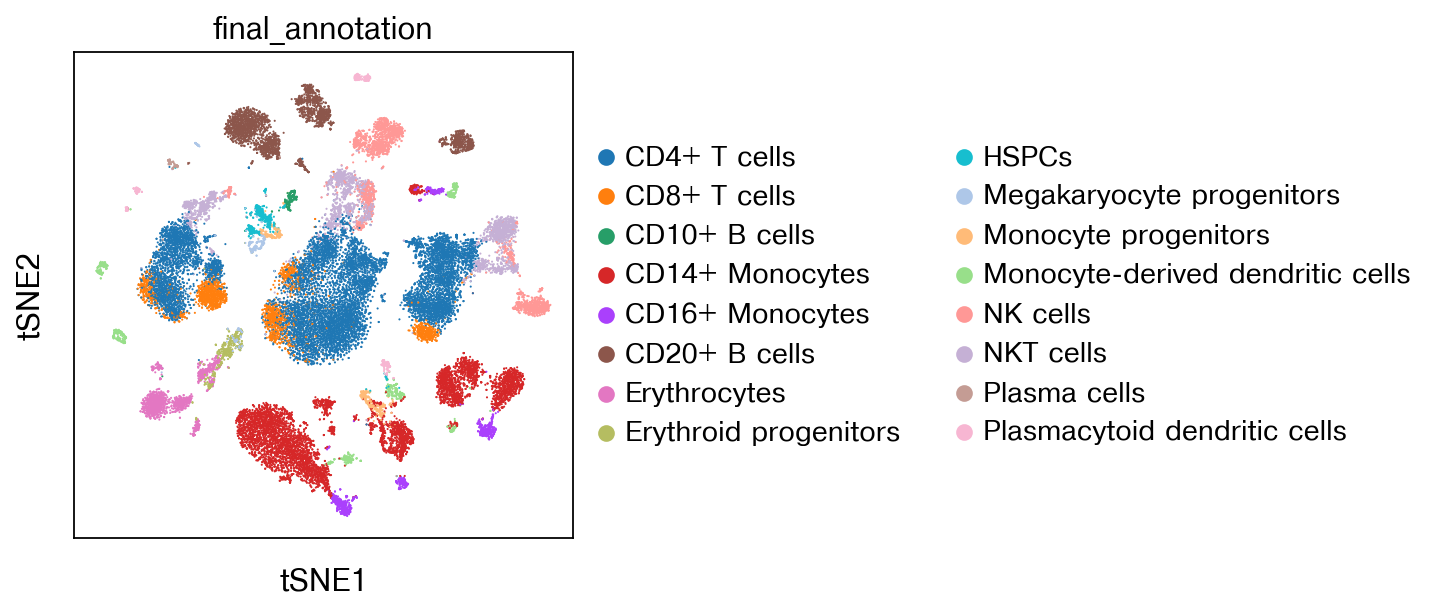

In [6]:
timeit(sg.sc.tsne)(adata=ad, use_rep='X_scvi')
sc.pl.tsne(ad, color='final_annotation')
timeit(sc.tl.tsne)(adata=ad)
sc.pl.tsne(ad, color='final_annotation')

In [7]:
gpu = timeit(sg.sb.silhouette)
cpu = timeit(scib.metrics.silhouette)
args = (ad, 'final_annotation', 'X_scvi')
print(gpu(*args))
print(cpu(*args))

Function silhouette Took 0.1257 seconds
0.5567144602537155
Function silhouette Took 27.4084 seconds
0.5567144602537155


In [8]:
gpu = timeit(sg.sb.silhouette_batch)
cpu = timeit(scib.metrics.silhouette_batch)
args = (ad, 'batch', 'final_annotation', 'X_scvi')
print(gpu(*args, verbose=False))
print(cpu(*args, verbose=False))

Function silhouette_batch Took 1.9438 seconds
0.8844511298161817
Function silhouette_batch Took 6.0301 seconds
0.8844511273704596
